# Instalando Bibliotecas


In [7]:
# Importando bibliotecas
import pandas as pd
import string
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
import numpy as np
import networkx as nx
!pip install plotly.express
from plotly import graph_objs as go

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


# Exemplo de Remoção de Stopwords

In [8]:
nltk.corpus.stopwords.words('portuguese')

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [9]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
# remoção de pontuacao e stopwords

def remove_stopwords(text,lang,domain_stopwords=[]):

  stop_words = nltk.corpus.stopwords.words(lang) # lang='portuguese' or lang='english'

  s = str(text).lower() # tudo para caixa baixa
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.translate(table) # remove pontuacao
  tokens = word_tokenize(s) #obtem tokens
  v = [i for i in tokens if not i in stop_words and not i in domain_stopwords and not i.isdigit()] # remove stopwords
  s = ""
  for token in v:
    if len(token) >= 4:
      s += token+" "
  return s.strip()


# exemplos de uso
text = "O estudante de Inteligência Artificial foi na livraria comprar  livros para estudar."
text2 = remove_stopwords(text, 'portuguese')
print('Antes: '+text)
print('Depois: '+text2)

Antes: O estudante de Inteligência Artificial foi na livraria comprar  livros para estudar.
Depois: estudante inteligência artificial livraria comprar livros estudar


# Exemplo de Stemming/Radicalização de Termos

In [11]:
# stemming
def stemming(text,lang):

  stemmer = PorterStemmer() # stemming para ingles

  if lang=='portuguese':
    stemmer = nltk.stem.RSLPStemmer() # stemming para portuguese

  tokens = word_tokenize(text) #obtem tokens

  sentence_stem = ''
  doc_text_stems = [stemmer.stem(i) for i in tokens]
  for stem in doc_text_stems:
    sentence_stem += stem+" "

  return sentence_stem.strip()


# exemplos de uso
text = "O estudante de Inteligência Artificial foi na livraria comprar livros para estudar."
text2 = remove_stopwords(text, 'portuguese')
text3 = stemming(text2, 'portuguese')
print('Antes: '+text)
print('Depois: '+text3)

Antes: O estudante de Inteligência Artificial foi na livraria comprar livros para estudar.
Depois: estud intelig artific livr compr livr estud


# Coletando uma Base de Textos para Testar

In [14]:
import urllib.parse
# obtendo dataset com uma amostra de textos

query = "febre amarela" # query para consultar
query = urllib.parse.quote(query)

url = 'http://websensors.net.br/minicurso/2019/eventos-br-2017.php?q='+query
print(url)

http://websensors.net.br/minicurso/2019/eventos-br-2017.php?q=febre%20amarela


In [15]:
!wget '{url}' -O dados.csv

--2024-11-20 14:34:47--  http://websensors.net.br/minicurso/2019/eventos-br-2017.php?q=febre%20amarela
Resolving websensors.net.br (websensors.net.br)... 129.121.3.177
Connecting to websensors.net.br (websensors.net.br)|129.121.3.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dados.csv’

dados.csv               [       <=>          ]   2.84M  1.96MB/s    in 1.4s    

2024-11-20 14:34:49 (1.96 MB/s) - ‘dados.csv’ saved [2979374]



In [16]:
dataset = pd.read_csv('dados.csv',sep='\t')
dataset

,event_id,date,title,local,url,lat,lng
0,b4b29e9b5537c1896129029bd976438c,2017-01-05 15:27:28,"Após 2ª morte por febre amarela em SP, vacinaç...",Ribeirao Preto (SP),http://g1.globo.com/sp/ribeirao-preto-franca/n...,-21.17,-47.81
1,125bf6fbeef15b17a1d4837127129bbe,2017-01-08 16:04:51,Casos de febre amarela em macacos na região pr...,Ribeirao Preto (SP),http://g1.globo.com/sao-paulo/sao-jose-do-rio-...,-21.17,-47.81
2,aff14d48f09878b31e0575971fc8fec2,2017-01-08 14:04:51,G1 - Casos de febre amarela em macacos na regi...,Sao Jose do Rio Preto (SP),http://g1.globo.com/sao-paulo/sao-jose-do-rio-...,-20.82,-49.37
3,ca7ca58720fc9a2338894095ba6409f0,2017-01-05 13:27:28,"Após 2ª morte por febre amarela em SP, vacinaç...",Sao Jose do Rio Preto (SP),http://g1.globo.com/sp/ribeirao-preto-franca/n...,-20.82,-49.37
4,2a6e78e1226fc9c5f1c9061febf175d1,2017-01-09 14:57:25,Mortes por febre amarela põem em alerta cidade...,Sao Jose do Rio Preto (SP),http://istoe.com.br/mortes-por-febre-amarela-p...,-20.82,-49.37
...,...,...,...,...,...,...,...
8641,061b9b603b8043696558f309ab184857,2017-12-14 15:59:34,Febre amarela já matou dez pessoas e 501 macac...,Mairipora (SP),http://www.atribuna.com.br/noticias/noticias-d...,-23.31,-46.58
8642,b3a86762a53202cc32b8773051a63b48,2017-12-11 15:15:00,Postos ainda têm vacinas contra Febre Amarela ...,Hortolandia (SP),http://liberal.com.br/cidades/hortolandia/post...,-22.85,-47.22
8643,a2aa3d517698a0c4586705b95cda38c2,2017-12-13 19:03:18,Febre amarela: veja lista de postos de vacinaç...,Embu (SP),https://g1.globo.com/sp/sao-paulo/noticia/febr...,-23.64,-46.85
8644,b6f07b1d0d4aebf8f518a1060567ceca,2017-05-10 21:45:08,Confirmado primeiro caso de febre amarela em p...,Paulo Afonso (BA),https://g1.globo.com/bahia/noticia/confirmado-...,-9.40,-38.22


In [17]:
# filtrando apenas o título
dataset = dataset[['title']].sample(1000)
dataset

,title
1532,Exceto o litoral Vacinação contra febre amarel...
6672,Saúde divulga Informe Epidemiológico da Febre ...
58,Teófilo Otoni decreta situação de emergência d...
3231,Secretaria confirma morte de macaco por febre ...
6216,Bebê de 4 meses vacinado contra a febre amarel...
...,...
622,Grande preocupação é explosão de casos de febr...
1615,Bahia registra primeira morte suspeita de febr...
294,Casos suspeitos de febre amarela em MG sobem p...
7498,Com quase 40 mortes de macacos por febre amare...


In [18]:
dataset.reset_index(drop=True,inplace=True)

In [ ]:
dataset

,title
0,Saúde divulga Informe Epidemiológico da Febre ...
1,Mato Grosso do Sul receberá 50 mil doses de va...
2,Mais 19 unidades de saúde passam a oferecer va...
3,Febre amarela: 91% da população de Jundiaí já ...
4,Vacinação contra a febre amarela movimenta Suz...
...,...
995,"SP registra 8ª morte por febre amarela, a 3ª d..."
996,População já começa a procurar postos para tom...
997,Exame confirma morte de macaco por febre amare...
998,Salvador terá 110 postos de vacinação contra a...


# Computando uma Bag-of-Words

In [21]:
# obtendo a bag-of-words
def compute_bag_of_words(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['title'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(d)

  count_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names_out())

  return count_vect_df


bow = compute_bag_of_words(dataset,'portuguese')
bow

,abert,abr,abril,acab,acess,ach,acompanh,admit,adolesc,adot,...,vár,víru,vítim,webdiari,wwwaquinoticiascom,zon,áre,áudi,óbit,únic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
bow[['febr']]

,febr
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [23]:
list(bow.columns)

['abert',
 'abr',
 'abril',
 'acab',
 'acess',
 'ach',
 'acompanh',
 'admit',
 'adolesc',
 'adot',
 'afet',
 'agend',
 'agent',
 'aglomer',
 'agor',
 'agrav',
 'aguard',
 'agênc',
 'aind',
 'akir',
 'alastr',
 'alde',
 'alegr',
 'alenqu',
 'alert',
 'algum',
 'alt',
 'ama',
 'amar',
 'amarel',
 'amazôn',
 'ambient',
 'ameaç',
 'americ',
 'ampar',
 'ampl',
 'ampli',
 'analis',
 'ananindeu',
 'andrad',
 'andré',
 'angr',
 'anhangu',
 'ano',
 'ant',
 'antecip',
 'anunc',
 'apen',
 'aplic',
 'apo',
 'apoi',
 'apont',
 'apreens',
 'apur',
 'após',
 'aquidau',
 'araraqu',
 'araruam',
 'ariquem',
 'arm',
 'aruj',
 'assinat',
 'associ',
 'assombr',
 'assust',
 'atend',
 'atiba',
 'atibaiacombr',
 'ating',
 'ativ',
 'atras',
 'atual',
 'aument',
 'autócton',
 'avanç',
 'açã',
 'açõ',
 'bah',
 'baian',
 'bairr',
 'baix',
 'balanç',
 'barbacenam',
 'barcaren',
 'barr',
 'bas',
 'batat',
 'bebê',
 'bel',
 'belford',
 'belved',
 'belém',
 'betim',
 'beveld',
 'biólog',
 'blasting',
 'blog',
 'bloqu

# Ponderação de Termos com TFIDF

In [24]:
# obtendo a VSM com TFIDF
def compute_vsm_tfidf(dataset,lang,domain_stopwords=[]):

  d = []
  for index,row in dataset.iterrows():
    text = row['title'] #texto do evento
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)

  matrix = TfidfVectorizer()
  X = matrix.fit_transform(d)

  tfidf_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names_out())

  return tfidf_vect_df


vsm = compute_vsm_tfidf(dataset,'portuguese')
vsm

,abert,abr,abril,acab,acess,ach,acompanh,admit,adolesc,adot,...,vár,víru,vítim,webdiari,wwwaquinoticiascom,zon,áre,áudi,óbit,únic
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.415541,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [25]:
vsm[['amarel']]

,amarel
0,0.065966
1,0.158006
2,0.063676
3,0.106410
4,0.056508
...,...
995,0.061379
996,0.107581
997,0.107334
998,0.071147


# Dissimilaridade de cosseno (1-cos) entre dois textos

In [26]:
# computando dissimilaridade de cosseno

def dis_cosine(matrix, e1, e2):
  dcos = cosine(matrix.iloc[e1,:], matrix.iloc[e2,:])
  return dcos


# exemplo: dissimilaride entre o primeiro (id=0) e o segundo evento (id=1) do vsm-tfidf
dis_cosine(vsm,1,2)

0.9798774911930753

In [27]:
# similaridade entre documento 1 e os outros 1 até 10

for i in range(1,11):
  print('doc=',i,dis_cosine(vsm,1,i))

doc= 1 0.0
doc= 2 0.9798774911930753
doc= 3 0.9663732732309923
doc= 4 0.9191340004362546
doc= 5 0.0
doc= 6 0.9698597109223562
doc= 7 0.9832926306842974
doc= 8 0.9644429178111528
doc= 9 0.9724426765530753
doc= 10 0.9644274310393592


In [28]:
input = 997
print('Entrada =',dataset.iloc[input].title)
for index2,row2 in vsm.iterrows():
    dcos = dis_cosine(vsm,input,index2)
    if dcos > 0 and dcos <= 0.6:
      text = dataset.iloc[index2].title
      print(input,index2,dcos,text)


Entrada = Casos suspeitos de febre amarela em MG sobem para 152, com... - Jornal O Globo
997 64 0.33191098474720504 Casos de febre amarela notificados em Minas Gerais sobem para 391 - Jornal O Globo
997 76 0.5611841633024932 Febre amarela chega a GO e MS; casos suspeitos sobem para 550 - Cidadeverde.com
997 102 0.5880875343009718 Mortes suspeitas por febre amarela sobem para 47 em Minas, diz governo - Globo.com
997 191 0.4767806623176811 MG foi o estado com mais casos e mortes por febre amarela desde ... - Jornal O Globo
997 203 0.23366344028070352 Sobe para 23 o número de casos de febre amarela no estado do Rio - Jornal O Globo
997 268 0.5318995435494882 Secretário de Saúde anuncia vacinação contra febre amarela ... - Jornal O Globo
997 315 0.45607621917402486 SP confirma primeira morte por febre amarela - Jornal O Globo
997 353 0.5107178269223996 Mortes suspeitas de febre amarela sobem para 30 em MG, diz secretaria
997 586 0.41564365987427 Sobe para 152 o número de casos suspeitos de

In [30]:
dataset.iloc[0].title

'Exceto o litoral Vacinação contra febre amarela se amplia para todo ... - www.aquinoticias.com (Blogue)'

# Resposta do Exercício - Aula 01

## Parte 1

In [29]:
def remove_stopwords(text,stop_words):

  # tudo para caixa baixa
  s = str(text).lower()

  tokens = word_tokenize(s)

  # remove stopwords, dígitos, caracteres especiais e pontuações
  v = [word for word in tokens if not word in stop_words and word.isalnum() and not word.isdigit()]

  return v

def stemming(tokens,stemmer):
  tokens_stems = [stemmer.stem(word) for word in tokens]
  return tokens_stems


def meu_tokenizador(doc, stop_words=nltk.corpus.stopwords.words('portuguese'), stemmer=PorterStemmer()):
  stop_words.append('febre')
  stop_words.append('amarela')
  tokens = remove_stopwords(doc,stop_words)
  return stemming(tokens,stemmer)

VSM = TfidfVectorizer(tokenizer=meu_tokenizador,min_df=3,ngram_range=(4,4))
X = VSM.fit_transform(dataset['title'])

df_bigrams_tfidfs = pd.DataFrame()
df_bigrams_tfidfs['word'] = VSM.get_feature_names_out()
df_bigrams_tfidfs['tfidf_sum'] = X.toarray().sum(axis=0)
df_bigrams_tfidfs.sort_values(by='tfidf_sum',ascending=False,inplace=True)
df_bigrams_tfidfs.head(50)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,word,tfidf_sum
77,saúd divulga inform epidemiológico,107.000000
39,mil dose vacina contra,11.488151
33,hemorio vacina contra semana,9.000000
63,procura vacina contra aumenta,7.000000
38,matou dez pessoa macaco,4.794092
97,vacinação contra nest sábado,4.393297
81,sespa recomenda população vacin,4.242641
67,recomenda população vacin contra,4.242641
30,governo mina confirma mort,4.000000
58,paulo intensifica vacinação contra,3.535534


## Parte 2

In [31]:
vsm

,abert,abr,abril,acab,acess,ach,acompanh,admit,adolesc,adot,...,vár,víru,vítim,webdiari,wwwaquinoticiascom,zon,áre,áudi,óbit,únic
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.415541,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(vsm, 2, metric='cosine')
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
import networkx as nx

G = nx.Graph(A.toarray())



In [34]:
from tqdm.notebook import tqdm
L_edges = []
for edge in tqdm(G.edges()):
  L_edges.append([edge[0],edge[1],1])

  0%|          | 0/1555 [00:00<?, ?it/s]

In [35]:
df_edges = pd.DataFrame(L_edges)
df_edges.columns = ['source', 'target', 'value']
df_edges

,source,target,value
0,0,379,1
1,0,416,1
2,1,5,1
3,1,31,1
4,2,155,1
...,...,...,...
1550,916,996,1
1551,919,960,1
1552,938,958,1
1553,947,975,1


In [36]:
import re
L_nodes = []
for node in G.nodes():
  L_nodes.append([node,list(pd.DataFrame(vsm.iloc[node]).sort_values(by=node,ascending=False).head(5).index)])

In [37]:
df_nodes = pd.DataFrame(L_nodes)
df_nodes.columns = ['id','text']
df_nodes

,id,text
0,0,"[excet, litor, wwwaquinoticiascom, tod, ampl]"
1,1,"[epidemiológ, divulg, inform, saúd, febr]"
2,2,"[teófil, oton, decret, dev, situ]"
3,3,"[varg, secret, macac, confirm, mort]"
4,4,"[mes, engan, bebê, vid, monitor]"
...,...,...
995,995,"[conheç, explos, especi, sintom, preocup]"
996,996,"[bah, prim, registr, suspeit, cas]"
997,997,"[glob, sob, jorn, suspeit, cas]"
998,998,"[algum, recus, quas, mor, jundiaí]"


In [38]:
df_edges.to_csv('edges.csv',sep=',')
df_nodes.to_csv('nodes.csv',sep=',')

### Exportar

Os arquivos edges.csv e nodes.csv podem ser visualizados e explorados em ferramentas de análise de grafos.
Por exemplo:
https://cosmograph.app/run/

# Agrupamento de Textos usando k-Means

In [39]:
from sklearn.cluster import KMeans
import numpy as np

num_cluster = 15

# normalizando os dados para usar distancia euclidiana
X = np.array(vsm)
length = np.sqrt((X**2).sum(axis=1))[:,None]
X = X / length

kmeans = KMeans(n_clusters=num_cluster, random_state=0, n_init=10).fit(X)



In [40]:
### Quais foram os representantes (centroides) de cada grupo?
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,784,785,786,787,788,789,790,791,792,793
0,2.168404e-18,-4.770490e-18,4.336809e-19,-3.903128e-18,4.878910e-19,7.806256e-18,8.131516e-19,8.673617e-19,-5.421011e-19,-1.084202e-18,...,-6.505213e-19,3.469447e-18,2.602085e-18,-2.168404e-19,-3.469447e-18,-1.387779e-17,8.673617e-19,-1.301043e-18,-8.673617e-19,-1.517883e-18
1,1.084202e-18,4.336809e-19,4.336809e-19,-3.469447e-18,3.794708e-19,2.331747e-02,6.505213e-19,5.421011e-19,-4.878910e-19,-6.505213e-19,...,-5.963112e-19,4.336809e-18,8.673617e-18,-9.757820e-19,-3.035766e-18,-1.214306e-17,1.513152e-02,-1.084202e-18,1.734723e-18,1.084202e-18
2,-1.084202e-18,2.602085e-18,4.336809e-19,9.816992e-03,0.000000e+00,2.602085e-18,1.626303e-19,-3.252607e-19,-3.794708e-19,4.336809e-19,...,-4.878910e-19,2.330492e-02,5.204170e-18,3.252607e-19,-1.301043e-18,-5.204170e-18,6.071532e-18,1.084202e-18,1.003694e-02,8.673617e-19
3,-2.168404e-19,3.035766e-18,4.336809e-19,-2.602085e-18,2.168404e-19,4.336809e-18,4.336809e-19,0.000000e+00,-4.878910e-19,0.000000e+00,...,-5.963112e-19,1.734723e-18,6.488737e-03,-4.336809e-19,-2.168404e-18,-1.040834e-17,7.806256e-18,-2.168404e-19,1.753573e-02,6.994628e-03
4,-1.084202e-18,9.663525e-03,3.252607e-19,-2.168404e-18,5.421011e-20,3.469447e-18,2.168404e-19,-5.421011e-19,-4.878910e-19,3.252607e-19,...,-5.963112e-19,-8.673617e-19,2.576064e-02,0.000000e+00,9.001474e-03,-8.673617e-18,6.071532e-18,6.505213e-19,-1.734723e-18,6.505213e-19
5,-6.505213e-19,4.336809e-19,2.168404e-19,4.336809e-19,-2.168404e-19,2.352129e-02,-2.168404e-19,2.168404e-19,-1.084202e-19,1.084202e-19,...,-2.168404e-19,-4.336809e-19,-8.673617e-19,3.252607e-19,1.977081e-02,3.469447e-18,0.000000e+00,-2.168404e-19,0.000000e+00,4.336809e-19
6,-8.673617e-19,2.638879e-02,4.336809e-19,-2.168404e-18,1.626303e-19,4.336809e-18,3.252607e-19,-3.252607e-19,-4.336809e-19,4.336809e-19,...,-5.421011e-19,4.336809e-19,6.071532e-18,-1.084202e-19,-1.734723e-18,-8.673617e-18,7.806256e-18,4.336809e-19,9.059616e-03,8.673617e-19
7,-4.336809e-19,4.336809e-19,2.168404e-19,4.336809e-19,-1.084202e-19,-8.673617e-19,-2.168404e-19,1.084202e-19,0.000000e+00,1.084202e-19,...,-1.084202e-19,-4.336809e-19,-8.673617e-19,4.336809e-19,8.673617e-19,3.469447e-18,4.976492e-02,-2.168404e-19,4.336809e-19,4.758802e-02
8,6.505213e-19,2.168404e-18,4.336809e-19,-3.469447e-18,2.710505e-19,5.204170e-18,5.421011e-19,3.252607e-19,-5.421011e-19,-5.421011e-19,...,-6.505213e-19,3.035766e-18,7.806256e-18,-8.673617e-19,-3.035766e-18,-1.214306e-17,8.673617e-18,-1.084202e-18,8.129669e-03,8.673617e-19
9,-6.505213e-19,8.673617e-19,3.252607e-19,8.673617e-19,-2.168404e-19,-8.673617e-19,-2.168404e-19,2.168404e-19,-1.084202e-19,2.168404e-19,...,-2.168404e-19,-4.336809e-19,0.000000e+00,3.252607e-19,8.673617e-19,3.469447e-18,8.673617e-19,-2.168404e-19,0.000000e+00,6.505213e-19


In [41]:
### Quais foram os clusters?

pd.DataFrame(kmeans.labels_)

,0
0,10
1,0
2,10
3,8
4,10
...,...
995,6
996,4
997,3
998,1


In [42]:
import re
L_nodes = []
for node in G.nodes():
  L_nodes.append([node,list(pd.DataFrame(vsm.iloc[node]).sort_values(by=node,ascending=False).head(5).index),'cluster_'+str(kmeans.labels_[node])])

In [43]:
df_nodes = pd.DataFrame(L_nodes)
df_nodes.columns = ['id','text','cluster']
df_nodes

,id,text,cluster
0,0,"[excet, litor, wwwaquinoticiascom, tod, ampl]",cluster_10
1,1,"[epidemiológ, divulg, inform, saúd, febr]",cluster_0
2,2,"[teófil, oton, decret, dev, situ]",cluster_10
3,3,"[varg, secret, macac, confirm, mort]",cluster_8
4,4,"[mes, engan, bebê, vid, monitor]",cluster_10
...,...,...,...
995,995,"[conheç, explos, especi, sintom, preocup]",cluster_6
996,996,"[bah, prim, registr, suspeit, cas]",cluster_4
997,997,"[glob, sob, jorn, suspeit, cas]",cluster_3
998,998,"[algum, recus, quas, mor, jundiaí]",cluster_1


In [44]:
df_nodes.to_csv('nodes.csv',sep=',')

# Classificação KNN

In [45]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/Dmoz-Health.csv

--2024-11-20 14:49:54--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/Dmoz-Health.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1182768 (1.1M) [text/plain]
Saving to: ‘Dmoz-Health.csv’

Dmoz-Health.csv     100%[===================>]   1.13M  --.-KB/s    in 0.05s   

2024-11-20 14:49:54 (24.6 MB/s) - ‘Dmoz-Health.csv’ saved [1182768/1182768]



In [46]:
import pandas as pd

dataset = pd.read_csv('Dmoz-Health.csv')
dataset

,file_name,text,class
0,1578510.txt,Illinois Church Action on Alcohol and Addictio...,Addictions
1,1577747.txt,AA Statewide Meeting lists for all of Vermont....,Addictions
2,1578166.txt,Gracer Medical Group Dr. Richard Gracer is a p...,Addictions
3,1577381.txt,"Phoenix Meetings, events, and visitor informat...",Addictions
4,1578793.txt,American River Area Narcotics Anonymous Resour...,Addictions
...,...,...,...
6495,Health_1628926.txt,Alzheimer's Family Day Center Located in Falls...,Senior
6496,Health_1628556.txt,Chancellor Health Partners Assisted Living and...,Senior
6497,Health_1628984.txt,"Resources For Aging, Inc. Publisher of ""The Ca...",Senior
6498,Health_1628509.txt,Lourdesville Nursing Home A purpose built nurs...,Senior


<Axes: >

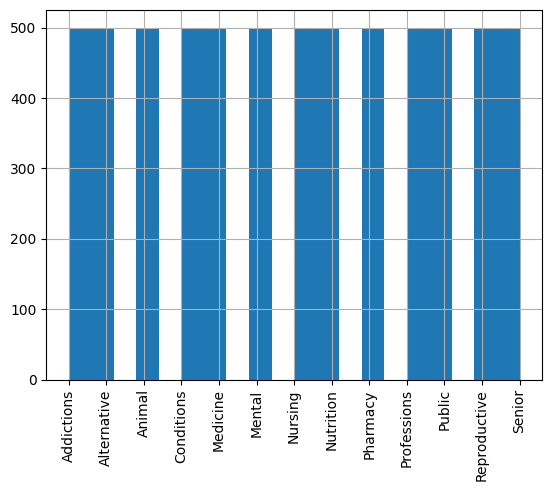

In [47]:
dataset['class'].hist(xrot=90,bins=20)

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size=0.33, random_state=42)

In [49]:
df_train

,file_name,text,class
1647,and_Diseases_1594311.txt,National Eye Institute - The Cornea and Cornea...,Conditions
2589,Health_1614027.txt,Alison Muir - B.A. Hons. Psych. Psychologist l...,Mental
1700,and_Diseases_1601766.txt,Talk About Sleep A sleep health community prov...,Conditions
5201,Health_and_Safety_1625559.txt,Arizona Emergency Medical Systems For over 25 ...,Public
6004,Health_1628690.txt,Delaware Nursing Care Center Skilled nursing a...,Senior
...,...,...,...
3772,1619360.txt,Society for Nutrition Education (SNE) For prof...,Nutrition
5191,Health_and_Safety_1624499.txt,"Wabasha Fire Department Stations, equipment, f...",Public
5226,Health_and_Safety_1626228.txt,University of Saskatchewan: Department of Comm...,Public
5390,Health_and_Safety_1623932.txt,Gravenhurst Volunteer Fire Department The GVFD...,Public


In [50]:
df_test

,file_name,text,class
3106,1618765.txt,Nurse CEU.com: Pediatrics List of links to Con...,Nursing
6161,Health_1629048.txt,Dementia: A Guide For The Caregiver A guide an...,Senior
1867,and_Diseases_1596988.txt,"Congenital Toxoplasmosis Includes symptoms, di...",Conditions
3238,1618104.txt,MUSC College of Nursing Medical University of ...,Nursing
5509,Health_1627315.txt,"Malpani Infertility Clinic Located in Bombay, ...",Reproductive
...,...,...,...
2917,Health_1614367.txt,"Elizabeth Fadale, LMHC Private practice locate...",Mental
596,1583133.txt,Human Hand - PalmTherapy A review of Palm Ther...,Alternative
6443,Health_1628680.txt,Connecticut Elder Reference Guide Infoline 211...,Senior
1068,1583908.txt,Holistic Stock Health Holistic health care for...,Animal


In [51]:
corpus = df_train.text.to_list()
corpus

['National Eye Institute - The Cornea and Corneal Eye Disease Provides patient information including causes of corneal disease, prevention, and treatment. Includes pictures, diagrams, research studies and additional resources. ',
 'Alison Muir - B.A. Hons. Psych. Psychologist located in Noosaville, Queensland, Australia. Includes the services offered, fee schedule, and contact information. ',
 'Talk About Sleep A sleep health community providing medicine news, information, and interactive support through nightly moderated chats and message boards. Informative for professionals, patients and others interested in sleep. ',
 'Arizona Emergency Medical Systems For over 25 years, AEMS, a non-profit, community-based volunteer organization dedicated to improving emergency medical services (EMS) for the Central Region of Arizona. ',
 'Delaware Nursing Care Center Skilled nursing and rehabilitation services in Wilmington, DE. Description of services offered, and contact information. ',
 'Adelai

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',min_df=2,norm=None)
X_train = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X_train.shape)

(4355, 4373)


In [53]:
y_train = df_train['class'].to_list()

In [54]:
y_train

['Conditions',
 'Mental',
 'Conditions',
 'Public',
 'Senior',
 'Addictions',
 'Medicine',
 'Animal',
 'Mental',
 'Nursing',
 'Medicine',
 'Pharmacy',
 'Animal',
 'Medicine',
 'Alternative',
 'Reproductive',
 'Alternative',
 'Conditions',
 'Animal',
 'Nutrition',
 'Medicine',
 'Nutrition',
 'Pharmacy',
 'Public',
 'Conditions',
 'Alternative',
 'Addictions',
 'Public',
 'Mental',
 'Pharmacy',
 'Alternative',
 'Nutrition',
 'Pharmacy',
 'Senior',
 'Public',
 'Alternative',
 'Senior',
 'Professions',
 'Medicine',
 'Professions',
 'Addictions',
 'Conditions',
 'Reproductive',
 'Senior',
 'Medicine',
 'Reproductive',
 'Nutrition',
 'Addictions',
 'Pharmacy',
 'Pharmacy',
 'Mental',
 'Addictions',
 'Pharmacy',
 'Senior',
 'Nutrition',
 'Mental',
 'Alternative',
 'Nursing',
 'Alternative',
 'Animal',
 'Medicine',
 'Nursing',
 'Pharmacy',
 'Alternative',
 'Conditions',
 'Reproductive',
 'Conditions',
 'Animal',
 'Professions',
 'Nursing',
 'Addictions',
 'Nutrition',
 'Alternative',
 'Nutriti

In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric="cosine",weights="distance")
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3, weights='distance')

In [56]:
corpus_test = df_test.text.to_list()
X_test = vectorizer.transform(corpus_test)
print(X_test.shape)

(2145, 4373)


In [57]:
y_pred = neigh.predict(X_test)

In [58]:
df_test['y_pred'] = y_pred
df_test

,file_name,text,class,y_pred
3106,1618765.txt,Nurse CEU.com: Pediatrics List of links to Con...,Nursing,Medicine
6161,Health_1629048.txt,Dementia: A Guide For The Caregiver A guide an...,Senior,Senior
1867,and_Diseases_1596988.txt,"Congenital Toxoplasmosis Includes symptoms, di...",Conditions,Animal
3238,1618104.txt,MUSC College of Nursing Medical University of ...,Nursing,Nursing
5509,Health_1627315.txt,"Malpani Infertility Clinic Located in Bombay, ...",Reproductive,Reproductive
...,...,...,...,...
2917,Health_1614367.txt,"Elizabeth Fadale, LMHC Private practice locate...",Mental,Mental
596,1583133.txt,Human Hand - PalmTherapy A review of Palm Ther...,Alternative,Professions
6443,Health_1628680.txt,Connecticut Elder Reference Guide Infoline 211...,Senior,Senior
1068,1583908.txt,Holistic Stock Health Holistic health care for...,Animal,Alternative


In [59]:
from sklearn.metrics import classification_report
y_true = df_test['class'].to_list()
y_pred = df_test['y_pred'].to_list()
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

  Addictions       0.78      0.85      0.81       187
 Alternative       0.73      0.72      0.73       152
      Animal       0.83      0.77      0.80       183
  Conditions       0.55      0.59      0.56       164
    Medicine       0.64      0.46      0.54       154
      Mental       0.70      0.63      0.66       163
     Nursing       0.73      0.78      0.75       176
   Nutrition       0.82      0.80      0.81       163
    Pharmacy       0.77      0.86      0.81       147
 Professions       0.73      0.84      0.78       162
      Public       0.76      0.81      0.78       166
Reproductive       0.79      0.77      0.78       154
      Senior       0.87      0.83      0.85       174

    accuracy                           0.75      2145
   macro avg       0.75      0.75      0.74      2145
weighted avg       0.75      0.75      0.75      2145



In [60]:
classes_list = pd.DataFrame(df_train['class'].unique()).sort_values(by=0)[0].to_list()
classes_list

['Addictions',
 'Alternative',
 'Animal',
 'Conditions',
 'Medicine',
 'Mental',
 'Nursing',
 'Nutrition',
 'Pharmacy',
 'Professions',
 'Public',
 'Reproductive',
 'Senior']

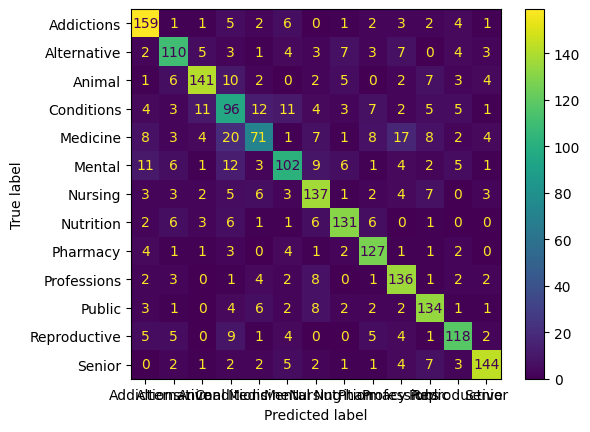

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes_list)
disp.plot()
plt.show()

In [62]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {
      'n_neighbors': [1,3,5,7],
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'cosine']
    }

neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)

clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine'],
                         'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [63]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006624,0.000555,0.176202,0.007376,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.391504,0.440873,0.375431,0.362801,0.384615,0.391045,0.026705,9
1,0.005275,0.001109,0.103395,0.016536,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.391504,0.440873,0.375431,0.362801,0.384615,0.391045,0.026705,9
2,0.004091,0.000492,0.140987,0.002133,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.331803,0.331803,0.297359,0.300804,0.324914,0.317336,0.015155,12
3,0.003838,0.000017,0.104125,0.002081,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.344432,0.354765,0.324914,0.323766,0.334099,0.336395,0.011820,11
4,0.003968,0.000182,0.154255,0.003603,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.243398,0.268657,0.244546,0.246843,0.259472,0.252583,0.009876,14
5,0.004224,0.000520,0.117158,0.005929,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.259472,0.278990,0.260620,0.254879,0.265212,0.263835,0.008260,13
6,0.003964,0.000165,0.153170,0.002855,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.198622,0.207807,0.200918,0.207807,0.205511,0.204133,0.003731,16
7,0.003922,0.000107,0.113941,0.001574,euclidean,7,distance,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.203215,0.213548,0.220436,0.216992,0.208955,0.212629,0.006049,15
8,0.003858,0.000068,0.121439,0.005419,cosine,1,uniform,"{'metric': 'cosine', 'n_neighbors': 1, 'weight...",0.690011,0.715270,0.701493,0.706085,0.704937,0.703559,0.008164,7
9,0.003800,0.000064,0.082818,0.000871,cosine,1,distance,"{'metric': 'cosine', 'n_neighbors': 1, 'weight...",0.690011,0.715270,0.701493,0.706085,0.704937,0.703559,0.008164,7


In [64]:
clf.best_params_

{'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}

In [65]:
clf.best_score_

0.7786452353616532

In [66]:
clf.best_estimator_.predict(X_test)

array(['Nursing', 'Reproductive', 'Conditions', ..., 'Senior', 'Animal',
       'Conditions'], dtype='<U12')

In [67]:
neigh_final = KNeighborsClassifier(metric='cosine',n_neighbors=7,weights='distance')
neigh_final.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=7, weights='distance')

In [68]:
y_pred2 = neigh_final.predict(X_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred2))

              precision    recall  f1-score   support

  Addictions       0.82      0.90      0.86       187
 Alternative       0.76      0.74      0.75       152
      Animal       0.91      0.80      0.85       183
  Conditions       0.61      0.67      0.64       164
    Medicine       0.72      0.54      0.61       154
      Mental       0.72      0.65      0.68       163
     Nursing       0.75      0.82      0.79       176
   Nutrition       0.83      0.84      0.83       163
    Pharmacy       0.83      0.85      0.84       147
 Professions       0.77      0.87      0.82       162
      Public       0.82      0.84      0.83       166
Reproductive       0.86      0.82      0.84       154
      Senior       0.85      0.88      0.87       174

    accuracy                           0.79      2145
   macro avg       0.79      0.79      0.79      2145
weighted avg       0.79      0.79      0.79      2145



In [70]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred3 = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred3))

              precision    recall  f1-score   support

  Addictions       0.88      0.86      0.87       187
 Alternative       0.75      0.74      0.75       152
      Animal       0.92      0.79      0.85       183
  Conditions       0.71      0.70      0.70       164
    Medicine       0.71      0.69      0.70       154
      Mental       0.73      0.71      0.72       163
     Nursing       0.74      0.91      0.82       176
   Nutrition       0.81      0.89      0.85       163
    Pharmacy       0.89      0.86      0.87       147
 Professions       0.79      0.80      0.80       162
      Public       0.87      0.84      0.85       166
Reproductive       0.82      0.81      0.82       154
      Senior       0.93      0.89      0.91       174

    accuracy                           0.81      2145
   macro avg       0.81      0.81      0.81      2145
weighted avg       0.81      0.81      0.81      2145

